In [252]:
%matplotlib inline

import json
import math

import numpy as np
import matplotlib.pyplot as plt

from abc import ABC, abstractmethod

In [3]:
class Experiment:
    def __init__(self, name, input_file, parameters, rounds):
        self.__name = name
        self.__input_file = input_file
        self.__parameters = parameters
        self.__rounds = rounds
        
    @property
    def name(self):
        return self.__name
    
    @property
    def input_file(self):
        return self.__input_file
    
    @property
    def parameters(self):
        return self.__parameters
    
    @property
    def rounds(self):
        return self.__rounds
    
    def __repr__(self):
        return 'Experiment(name={0}, input_file={1}, parameters={2})'.format(
            self.__name, self.__input_file, self.__parameters)
    
class Round:
    def __init__(self, duration, objective, n):
        self.__duration = duration
        self.__objective = objective
        self.__n = n
        
    @property
    def duration(self):
        return self.__duration
    
    @property
    def objective(self):
        return self.__objective
    
    @property
    def n(self):
        return self.__n
    
    def __repr__(self):
        return 'Round(duration={0}, objective={1}, n={2})'.format(
            self.__duration, self.__objective, self.__n)

In [4]:
class ExperimentLogParser:
    @abstractmethod
    def parse(self, file_path):
        pass

class PrefixExperimentLogParser(ExperimentLogParser):
    def __init__(self, prefix, parameters):
        self.__prefix = prefix
        self.__parameters = parameters
    
    def parse(self, file_path):
        with open(file_path, 'r') as f:
            lines = PrefixExperimentLogParser.filter_lines(f.readlines(), self.__prefix)
            
            rounds = []
            for line in lines[1:]:
                round_prop = json.loads(line)
                rounds.append(Round(round_prop['duration'], round_prop['objective'], round_prop['round']))
                
            experiment_prop = json.loads(lines[0])
            
            name = experiment_prop['name']
            input_file = experiment_prop['inputFile']
            parameters = {
                'eta': experiment_prop['eta'],
                'lambda': experiment_prop['lambda'],
                'H': experiment_prop['localIterFrac'],
                'K': experiment_prop['numSplits']
            }
            
            return Experiment(name, input_file, parameters, rounds)
        
    @staticmethod
    def filter_lines(lines, prefix):
        return [line[line.find(prefix) + len(prefix):] for line in lines if prefix in line]

In [888]:
#input_path_local = '/Users/Chris/Downloads/exp_result.txt'
input_path_local = '/Users/Chris/Downloads/thesis/experiments_local_6.txt'
input_path_spark = '/Users/Chris/Downloads/thesis/experiments_spark_3.txt'

In [889]:
parser = PrefixExperimentLogParser(prefix='EXPERIMENT|', parameters=['eta', 'lambda', 'localIterFrac', 'numSplits'])

In [890]:
parser.parse(input_path_local)

IndexError: list index out of range

In [891]:
def plot_results(experiment):
    timestamps = [rnd.duration / 1000 for rnd in experiment.rounds]
    objectives = [rnd.objective for rnd in experiment.rounds]
    
    cum_time = np.cumsum(timestamps)
    objectives_arr = (np.array(objectives) - np.array(objectives).min())
    
    print(np.array(objectives).min())
    
    max_idx = -1
    for i, objective in enumerate(objectives_arr):
        if objective < 1e-4:
            max_idx = i
            break
    
    cum_time = cum_time[:max_idx]
    objectives_arr = objectives_arr[:max_idx]
    timestamps = timestamps[:max_idx]
    
    plt.figure(figsize=(8, 6))
    plt.xlim((0, cum_time[-1]))
    plt.ylim(1e-4)
    plt.yticks([10e-1, 10e-2, 10e-3, 10e-4])
    plt.semilogy(cum_time, objectives_arr, marker='o')
    plt.xlabel(r'Seconds')
    plt.ylabel(r'Suboptimality: $O_B(w) - O_B(w^*)$')
    plt.grid(True, which="both")

In [905]:
def plot_results_2(experiment1, experiment2):
    timestamps1 = [rnd.duration / 1000 for rnd in experiment1.rounds]
    objectives1 = [rnd.objective for rnd in experiment1.rounds]
    cum_time1 = np.cumsum(timestamps1)
    objectives_arr1 = (np.array(objectives1) - np.array(objectives1).min())
    
    max_idx = -1
    for i, objective in enumerate(objectives_arr1):
        if objective < 1e-4:
            max_idx = i
            break
    
    cum_time1 = cum_time1[:max_idx]
    objectives_arr1 = objectives_arr1[:max_idx]
    timestamps1 = timestamps1[:max_idx]
    
    timestamps2 = [rnd.duration / 1000 for rnd in experiment2.rounds]
    objectives2 = [rnd.objective for rnd in experiment2.rounds]
    cum_time2 = np.cumsum(timestamps2)
    objectives_arr2 = (np.array(objectives2) - np.array(objectives2).min())
    
    max_idx = -1
    for i, objective in enumerate(objectives_arr2):
        if objective < 1e-4:
            max_idx = i
            break
    
    cum_time2 = cum_time2[:max_idx]
    objectives_arr2 = objectives_arr2[:max_idx]
    timestamps2 = timestamps2[:max_idx]
    
    plt.figure(figsize=(8, 6))
    plt.xlim((0, max(cum_time1[-1], cum_time2[-1])))
    plt.ylim(1e-6)
    plt.yticks([10e-1, 10e-2, 10e-3, 10e-4, 10e-5, 10e-6])
    plt.semilogy(cum_time1, objectives_arr1, marker='x')
    plt.semilogy(cum_time2, objectives_arr2, marker='o')
    plt.xlabel(r'Seconds')
    plt.ylabel(r'Suboptimality: $O_B(w) - O_B(w^*)$')
    plt.legend(['Local', 'Spark'], loc='lower left')

In [906]:
experiment = parser.parse(input_path_local)

IndexError: list index out of range

0.2171884


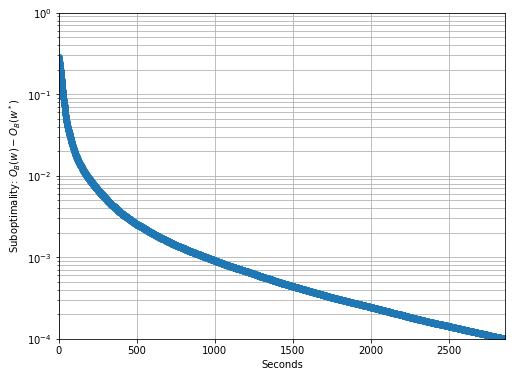

In [907]:
plot_results(experiment)

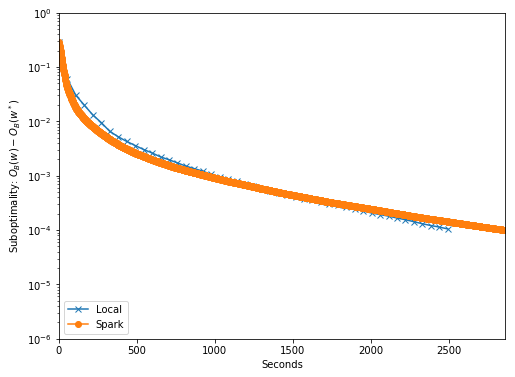

In [908]:
parser_spark = PrefixExperimentLogParser(prefix='EXPERIMENT|', parameters=['eta', 'lambda', 'localIterFrac', 'numSplits'])
parser_local = PrefixExperimentLogParser(prefix='', parameters=['eta', 'lambda', 'localIterFrac', 'numSplits'])
plot_results_2(parser_local.parse(input_path_local), parser_spark.parse(input_path_spark))